In [9]:
import pandas as pd
import numpy as np
############# matplotlib setting ################
import matplotlib as mpl
# font
mpl.rc('font', family='Arial' ,size=12, weight='normal')
mpl.rc('text', usetex=False)

# save
mpl.rc('savefig', dpi=300, format='png', transparent=True)

# tight axis
mpl.rc('axes', xmargin=0.01, ymargin=0.05)
mpl.rc('figure', autolayout=True, figsize=(3.5, 3.5))

# legend
mpl.rc('legend', fancybox=False, framealpha=0.7, frameon=True, fontsize=10)

# marker
mpl.rc('lines', linewidth=1.5, markersize=6, markeredgewidth=0.5)

# color
mpl.rc('image', cmap='rainbow')
mpl.rc('scatter', edgecolors='black')

# reset button
# mpl.rcdefaults()
#################################################
import matplotlib.pyplot as plt
import os
import sys
from glob import glob

In [ ]:
working_dir = os.getcwd()
base_dir = os.path.dirname(working_dir)
material='Li20Ge2P4S24'
mat_dir = os.path.join(base_dir, material)
ase_path = os.path.join(mat_dir, 'rtx2060/ase_new')
matsci_path = os.path.join(mat_dir, 'rtx2060/matsci_new')
mat_list = ['', '_112', '_122', '_222']
mat_size = [50, 100, 200, 400]

ase_total_avg_time = {}
matsci_total_avg_time = {}

for i, mat in enumerate(mat_list):
    ase_log_path = os.path.join(ase_path, f'{material}{mat}.txt')
    matsci_log_path = os.path.join(matsci_path, f'{material}{mat}.txt')
    with open(ase_log_path, 'r') as f:
        ase_lines = f.readlines()
        ase_total_avg_time[mat_size[i]] = float(ase_lines[-1].split()[-2])

    with open(matsci_log_path, 'r') as f:
        matsci_lines = f.readlines()
        matsci_total_avg_time[mat_size[i]] = float(matsci_lines[-1].split()[-2])


# read big log
# ase_graph_log = glob(os.path.join(ase_path, '*.log'))[0]
# matsci_graph_log = glob(os.path.join(matsci_path, '*.log'))[0]
# ase_graph_time = [0.021, 0.027, 0.025, ]
# matsci_graph_time = [0.001, 0.002, 0.003, 0.006]
# ase_graph_time = np.array([28.8e-3, 37.3e-3, 45.7e-3, 69.2e-3])
# matsci_graph_time = np.array([781e-6, 1.53e-3, 2.36e-3, 4.36e-3])
ase_graph_time = np.array([0.023, 0.03, 0.03, 0.052])
matsci_graph_time = np.array([0.001, 0.002, 0.0027, 0.004])


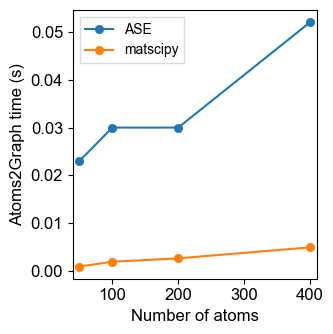

In [72]:
# draw ase_graph_time and matsci_graph_time
fig, ax = plt.subplots()
ax.plot(mat_size, ase_graph_time, 'o-', label='ASE')
ax.plot(mat_size, matsci_graph_time, 'o-', label='matscipy')
ax.set_xlabel('Number of atoms')
ax.set_ylabel('Atoms2Graph time (s)')
# give margin to graph
ax.set_xlim([40, 410])
ax.legend()
plt.savefig('atoms2graph_time.png', dpi=300)

In [73]:
# ase_per_step = np.array([np.mean([36.45/534, 36.6/537, 34.4/504, 35.9/526, 35.9/526]),
#                          np.mean([62/898, 61.2/889, 61.3/889, 61.7/895, 61.4/890]),
#                          np.mean([112.7, 111.2, 110.3, 111.7]),

#                          ])
# matsci_per_step = np.array([])

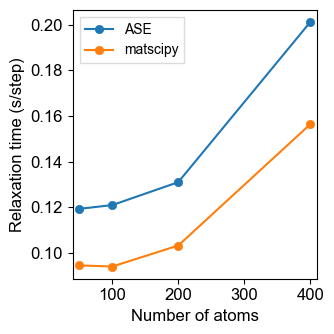

In [90]:
# draw ase_total_avg_time and matsci_total_avg_time
fig, ax = plt.subplots()
ax.plot(mat_size, np.array(list(ase_total_avg_time.values()))/100, 'o-', label='ASE')
ax.plot(mat_size, np.array(list(matsci_total_avg_time.values()))/100, 'o-', label='matscipy')
ax.set_xlabel('Number of atoms')
ax.set_ylabel('Relaxation time (s/step)')
# save figure
ax.set_xlim([40, 410])
ax.legend()

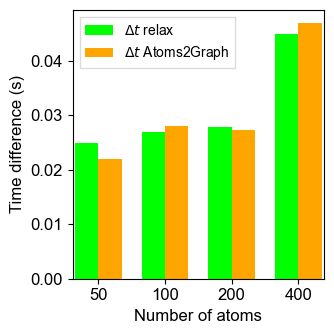

In [104]:
delta_step = np.array(list(ase_total_avg_time.values()))/100 - np.array(list(matsci_total_avg_time.values()))/100
delta_graph = ase_graph_time - matsci_graph_time
# plot bar graph
fig, ax = plt.subplots()
width = 0.35
x = np.arange(len(mat_size))
ax.bar(x - width/2, delta_step, width, label='${\Delta t}$ relax', color='lime')
ax.bar(x + width/2, delta_graph, width, label='${\Delta t}$ Atoms2Graph', color='orange')
ax.set_xlabel('Number of atoms')
ax.set_ylabel('Time difference (s)')
# chage xticks to mat_size
ax.set_xticks(x)
ax.set_xticklabels(mat_size)
ax.legend()